## MINI CNN

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from IPython.display import display, HTML
import os

tf.get_logger().setLevel('ERROR')

**Stap 1: Laad het VGG16-model**

In [5]:
model = VGG16(weights='imagenet') 

**Stap 2: Laad en toon de originele afbeelding**

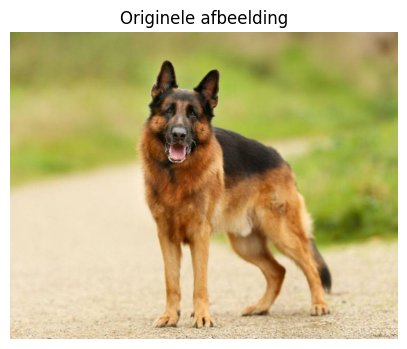

In [6]:
img_path = '../pictures/dog.jpg'
original_img = image.load_img(img_path)
plt.figure(figsize=(5, 5))
plt.imshow(original_img)
plt.title('Originele afbeelding')
plt.axis('off')
plt.show()

**Stap 3: Converteer afbeelding naar 224x224 pixels (VGG16-standaard)**

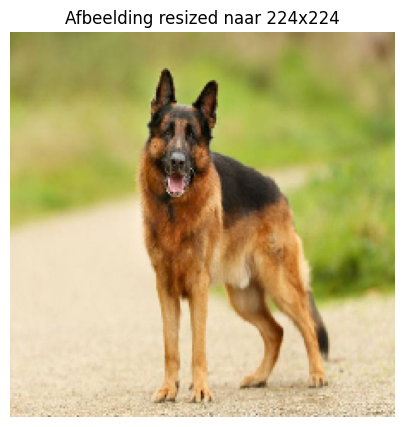

In [7]:
resized_img = image.load_img(img_path, target_size=(224, 224))
plt.figure(figsize=(5, 5))
plt.imshow(resized_img)
plt.title('Afbeelding resized naar 224x224')
plt.axis('off')
plt.show()

**Stap 4: Zet de afbeelding om naar een NumPy-array (soort python list)**

In [8]:
img_array = image.img_to_array(resized_img)
print("Vorm van de afbeelding als array:", img_array.shape) 

# Uitkomst: (224, 224, 3) → Dit betekent: 224 pixels breed, 224 pixels hoog, 3 kleurkanalen (RGB).

Vorm van de afbeelding als array: (224, 224, 3)


**Stap 5: Toon de eerste 5 pixels van de bovenste rij (RGB-waarden)**

Originele RGB-waarden (eerste 5 pixels in de bovenste rij):
[[124. 129.  49.]
 [128. 133.  53.]
 [132. 137.  57.]
 [130. 135.  55.]
 [132. 139.  59.]]


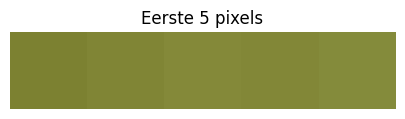

In [9]:
# Print de eerste 5 pixels in de bovenste rij als tekst
print("Originele RGB-waarden (eerste 5 pixels in de bovenste rij):")
print(img_array[0, :5])  # Print eerste 5 pixels

# Selecteer de eerste 5 pixels als een klein afbeeldingsfragment
mini_img_first = img_array[:1, :5]  # Eerste rij, eerste 5 kolommen
mini_img_first = mini_img_first.astype(int)  # Zorg dat het integers zijn

# Visualiseer de eerste 5 pixels als een mini-afbeelding
plt.figure(figsize=(5, 1))
plt.imshow(mini_img_first)
plt.title("Eerste 5 pixels")
plt.axis('off')
plt.show()


**Stap 6: Normaliseren met preprocess_input()**

In [10]:
img_array_expanded = np.expand_dims(img_array, axis=0)  # Voeg batchdimensie toe
img_array_preprocessed = preprocess_input(img_array_expanded)  # Normaliseren

Neurale netwerken zijn sneller en beter als de invoerwaarden gecentreerd rond 0 zijn, in plaats van tussen 0 en 255. (andere optie is alles delen door 255, dan is alles tussen de 0 en 1)

**ImageNet-gemiddelden per kleurkanaal:**
- **Rood (R):** `123.68`
- **Groen (G):** `116.78`
- **Blauw (B):** `103.94`

**Voorbeeldberekening:**
```python
R = 124.0 - 123.68  # = 0.32
G = 129.0 - 116.78  # = 12.22
B = 49.0 - 103.94   # = -54.94

waarom?
-waarden zijn niet meer tussen 0 en 255, maar verschuiven naar een bereik gecentreerd rondom 0.
-positief getal is hoger dan gemiddeld
-negatief getal is lager dan gemiddeld

**Stap 7 : Modelvoorspelling uitvoeren**

In [11]:
predictions = model.predict(img_array_preprocessed)
decoded_predictions = decode_predictions(predictions, top=3)[0]

1/1 [==============================] - 0s 433ms/step


**Stap 8: Toon de voorspelling**

In [14]:
html_output = "<div style='font-size:20px;'>"
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    html_output += f"{i+1}: <b>{label}</b> ({score:.2%})<br>"
html_output += "</div>"
display(HTML(html_output))


## 1000 labels?

In [18]:
def load_and_process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize afbeelding naar 224x224
    img_array = image.img_to_array(img)  # Converteer naar NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Voeg batch-dimensie toe (1, 224, 224, 3)
    img_array = preprocess_input(img_array)  # Preprocessing voor VGG16
    return img_array, img  # Geef zowel de array als de originele afbeelding terug

In [21]:
image_folder = '../pictures/batch_easy/'
#image_folder = '../pictures/batch_hard/'
image_files = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

batch_images = []
original_images = []

for img_path in image_files:
    img_array, original_img = load_and_process_image(img_path)
    batch_images.append(img_array)
    original_images.append(original_img)

Vorm van de batch: (5, 224, 224, 3)
1/1 [==============================] - 1s 644ms/step


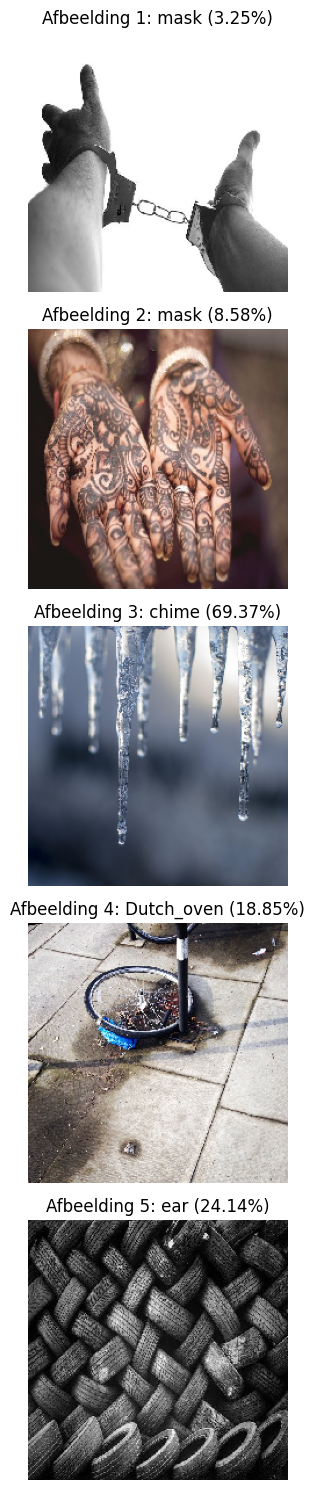

In [22]:
batch_images_array = np.vstack(batch_images)
print("Vorm van de batch:", batch_images_array.shape)  
predictions = model.predict(batch_images_array)
plt.figure(figsize=(15, len(image_files) * 3)) 

for i, pred in enumerate(predictions):
    decoded = decode_predictions(np.expand_dims(pred, axis=0), top=1)[0][0]  # Alleen eerste voorspelling

    best_label = decoded[1]  
    best_score = decoded[2]  
    prediction_text = f"{best_label} ({best_score:.2%})"
    plt.subplot(len(image_files), 1, i + 1)
    plt.imshow(original_images[i])
    plt.title(f"Afbeelding {i+1}: {prediction_text}")
    plt.axis("off")

plt.tight_layout()
plt.show()